In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# this dataset if for badminton review
review1 = pd.read_csv("data.csv")
review1.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [41]:
review1.shape

(8518, 8)

In [42]:
review1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [43]:
review1.duplicated().sum()

4

In [44]:
review1.drop_duplicates(inplace=True)

In [45]:
review1.duplicated().sum()

0

In [46]:
review1.isna().sum()

Reviewer Name        6
Review Title         6
Place of Review     46
Up Votes             6
Down Votes           6
Month              461
Review text          4
Ratings              0
dtype: int64

In [47]:
# review1.dropna(inplace=True)

In [48]:
# review1.isna().sum()

In [49]:
def assign_ratings(ratings):
    if ratings == 5 or ratings == 4:
        return "Positive"
    else:
        return "Negative"


review1["Target"]=review1["Ratings"].apply(assign_ratings)

In [50]:
review1.Target.value_counts()

Target
Positive    6825
Negative    1689
Name: count, dtype: int64

In [51]:
cleaned_df = review1[['Review text', 'Target']]

In [52]:
cleaned_df.duplicated().sum()

3458

In [53]:
cleaned_df.drop_duplicates(inplace=True)

C:\Users\Manisha\AppData\Local\Temp\ipykernel_6452\181483249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop_duplicates(inplace=True)


In [54]:
cleaned_df.duplicated().sum()

0

In [55]:
cleaned_df.isna().sum()

Review text    2
Target         0
dtype: int64

In [56]:
cleaned_df.dropna(inplace=True)

C:\Users\Manisha\AppData\Local\Temp\ipykernel_6452\3584568400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(inplace=True)


In [57]:
cleaned_df.isna().sum()

Review text    0
Target         0
dtype: int64

In [58]:
cleaned_df.shape

(5054, 2)

In [59]:
cleaned_df.head()

,Review text,Target
0,"Nice product, good quality, but price is now r...",Positive
1,They didn't supplied Yonex Mavis 350. Outside ...,Negative
2,Worst product. Damaged shuttlecocks packed in ...,Negative
3,"Quite O. K. , but nowadays the quality of the...",Negative
4,Over pricedJust â?¹620 ..from retailer.I didn'...,Negative


In [60]:
cleaned_df['target']=cleaned_df['Target'].map({'Positive':1,'Negative':0})

C:\Users\Manisha\AppData\Local\Temp\ipykernel_6452\2359280761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['target']=cleaned_df['Target'].map({'Positive':1,'Negative':0})


In [61]:
x=cleaned_df['Review text']
y=cleaned_df['target']

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4043,)
(1011,)
(4043,)
(1011,)


In [103]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Bidirectional, LSTM, Dense, GRU

In [65]:
# Tokenization
max_words = 5000
max_len = 50
tokenizer = Tokenizer(num_words=max_words, oov_token='<oov>')

In [66]:
tokenizer.fit_on_texts(x_train)

In [67]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [68]:
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

In [69]:
x_train_pad.shape

(4043, 50)

### SimpleRNN

**Sequential**

Creates a sequential model, meaning layers will be added one after the other.

**Embedding Layer**

Converts each word index into a dense vector of size 64.

input_dim=max_words: Vocabulary size (only the top max_words are considered).

output_dim=64: Dimension of each word embedding.

input_length=max_len: The length of input sequences (ensures the network knows how long each input will be).

Example: "good product" → [12, 98] → embedding → [ [0.12, 0.45,...], [0.87, 0.65,...] ]

**SimpleRNN Layer**

Reads the sequence word by word and maintains a hidden state.

64: Number of hidden units.

return_sequences=False: Only output the last hidden state (good for classification).

If you set return_sequences=True, it would output the hidden state for every time step (useful for sequence-to-sequence tasks).

                                                                                        
**Fully Connected Dense Layer**

Takes the RNN’s output and learns more abstract representations.

32 neurons with ReLU activation help capture non-linear patterns.

**Output Layer**

Since this is a binary classification (Positive vs Negative), you need 1 output neuron.

sigmoid gives a probability between 0 and 1.

Output > 0.5 → Positive, else Negative.
                                                                                        

In [70]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Manisha\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [71]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,369 (1.26 MB)

 Trainable params: 330,369 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.7436 - loss: 0.5819 - val_accuracy: 0.6884 - val_loss: 0.5526
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.7532 - loss: 0.5101 - val_accuracy: 0.7814 - val_loss: 0.4526
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.8445 - loss: 0.3754 - val_accuracy: 0.3680 - val_loss: 1.1747
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7530 - loss: 0.5170 - val_accuracy: 0.8091 - val_loss: 0.4411
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8406 - loss: 0.3937 - val_accuracy: 0.8180 - val_loss: 0.4645


In [76]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8291 - loss: 0.4549


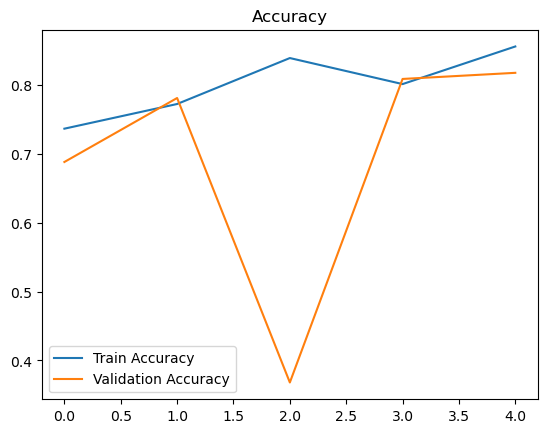

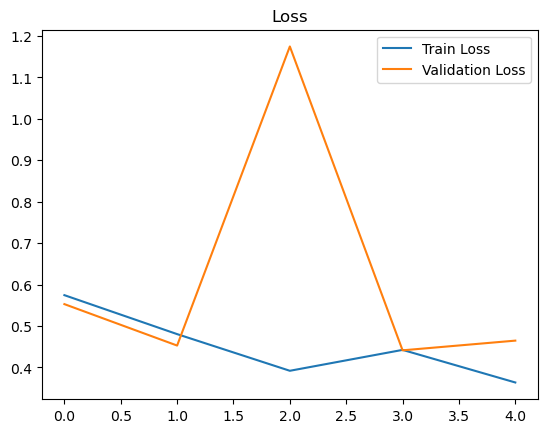

In [77]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Bidirectional RNN

In [84]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(Bidirectional(SimpleRNN(64, return_sequences=False)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [85]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [86]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 340,673 (1.30 MB)

 Trainable params: 340,673 (1.30 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.7495 - loss: 0.5412 - val_accuracy: 0.8368 - val_loss: 0.3700
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8886 - loss: 0.2952 - val_accuracy: 0.8734 - val_loss: 0.3372
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9290 - loss: 0.1922 - val_accuracy: 0.8655 - val_loss: 0.3585
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9629 - loss: 0.1160 - val_accuracy: 0.8595 - val_loss: 0.4214
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.9676 - loss: 0.0950 - val_accuracy: 0.8546 - val_loss: 0.4644


In [88]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8422 - loss: 0.4818


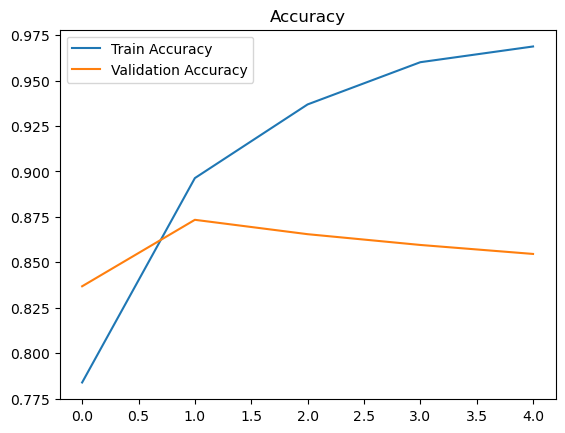

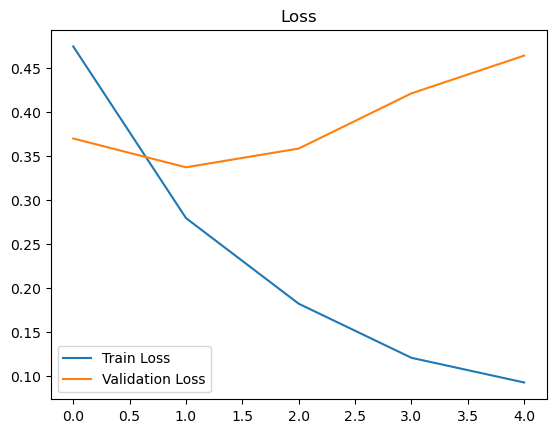

In [89]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### LSTM

In [90]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [91]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [92]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,137 (1.35 MB)

 Trainable params: 355,137 (1.35 MB)

 Non-trainable params: 0 (0.00 B)

In [93]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.7108 - loss: 0.6048 - val_accuracy: 0.7260 - val_loss: 0.5916
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7680 - loss: 0.5109 - val_accuracy: 0.7567 - val_loss: 0.4993
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7776 - loss: 0.4763 - val_accuracy: 0.7913 - val_loss: 0.5052
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8284 - loss: 0.4495 - val_accuracy: 0.7864 - val_loss: 0.4986
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.7842 - loss: 0.4585 - val_accuracy: 0.7290 - val_loss: 0.5193


In [94]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7125 - loss: 0.5394


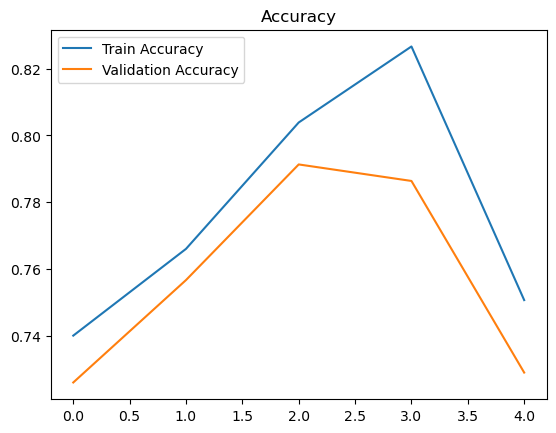

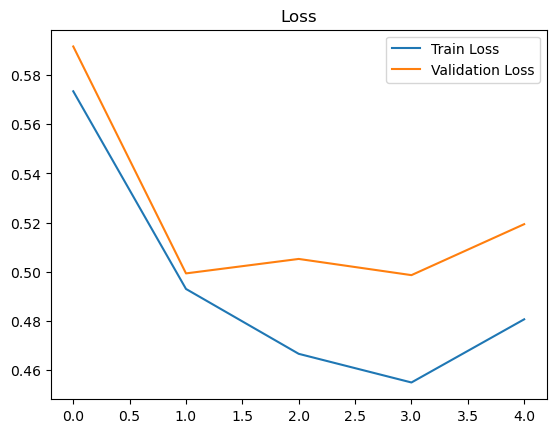

In [95]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Bidirectional LSTM

In [96]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [97]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [98]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,209 (1.49 MB)

 Trainable params: 390,209 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 0.7625 - loss: 0.5120 - val_accuracy: 0.8754 - val_loss: 0.3296
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8957 - loss: 0.2877 - val_accuracy: 0.8694 - val_loss: 0.3317
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9314 - loss: 0.2076 - val_accuracy: 0.8823 - val_loss: 0.3295
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9424 - loss: 0.1705 - val_accuracy: 0.8516 - val_loss: 0.3629
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.9447 - loss: 0.1582 - val_accuracy: 0.8635 - val_loss: 0.4937


In [100]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8638 - loss: 0.4945


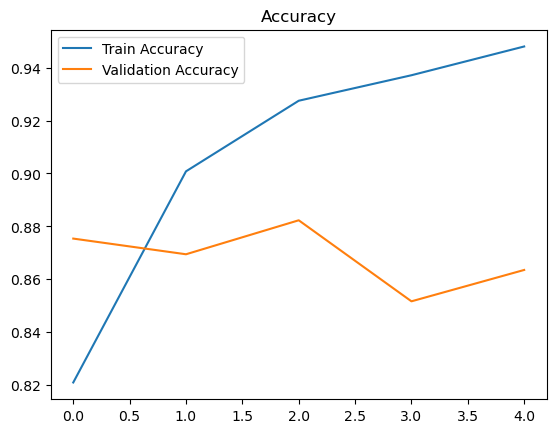

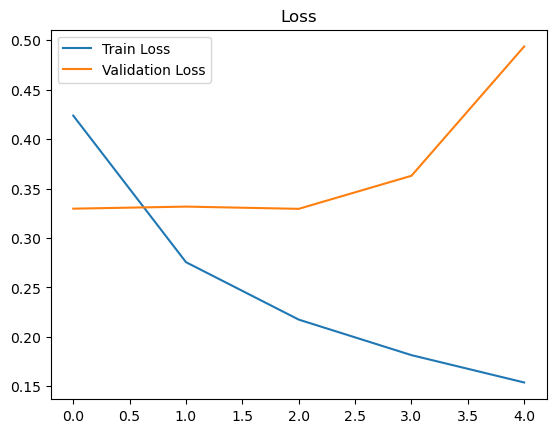

In [101]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### GRU (Gated Recurrent Unit)

In [104]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(GRU(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [105]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [106]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 347,073 (1.32 MB)

 Trainable params: 347,073 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.7181 - loss: 0.5959 - val_accuracy: 0.7290 - val_loss: 0.5849
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7256 - loss: 0.5876 - val_accuracy: 0.7290 - val_loss: 0.5850
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7321 - loss: 0.5856 - val_accuracy: 0.7270 - val_loss: 0.5826
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8103 - loss: 0.4442 - val_accuracy: 0.8823 - val_loss: 0.3177
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9148 - loss: 0.2523 - val_accuracy: 0.8833 - val_loss: 0.3096


In [108]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8845 - loss: 0.3075


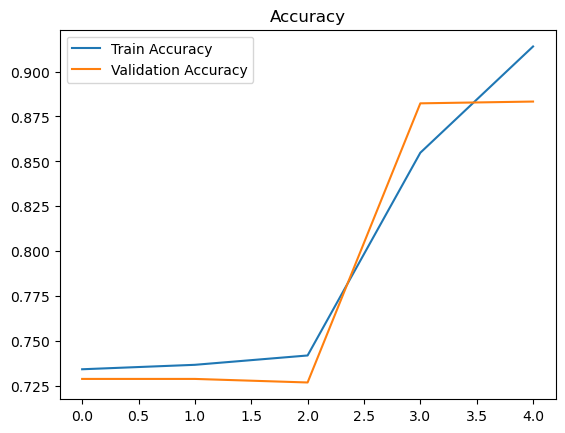

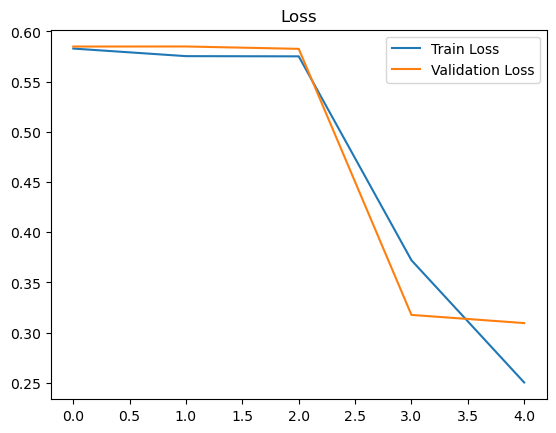

In [109]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Bidirectional GRU

In [111]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=64,input_length=max_len))
model.add(Bidirectional(GRU(64, return_sequences=False)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [112]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 50, 64)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 128)                 │          49,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 374,081 (1.43 MB)

 Trainable params: 374,081 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

In [114]:
history = model.fit(x_train_pad, y_train, epochs=5, batch_size=16, validation_data=(x_test_pad, y_test))

Epoch 1/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.7874 - loss: 0.4883 - val_accuracy: 0.8684 - val_loss: 0.3317
Epoch 2/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.9012 - loss: 0.2593 - val_accuracy: 0.8734 - val_loss: 0.3217
Epoch 3/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.9379 - loss: 0.1965 - val_accuracy: 0.8665 - val_loss: 0.3416
Epoch 4/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9424 - loss: 0.1749 - val_accuracy: 0.8576 - val_loss: 0.3781
Epoch 5/5
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.9492 - loss: 0.1491 - val_accuracy: 0.8546 - val_loss: 0.3863


In [115]:
loss, accuracy = model.evaluate(x_test_pad, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8637 - loss: 0.3695


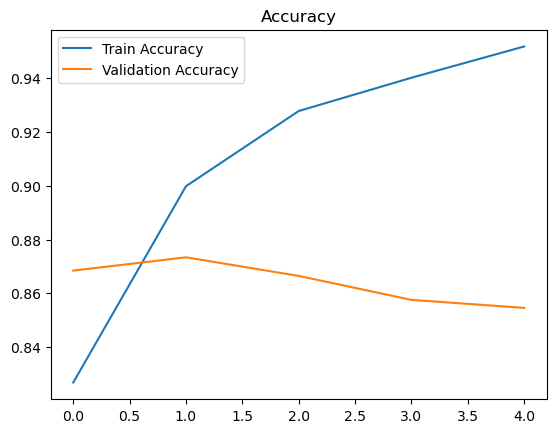

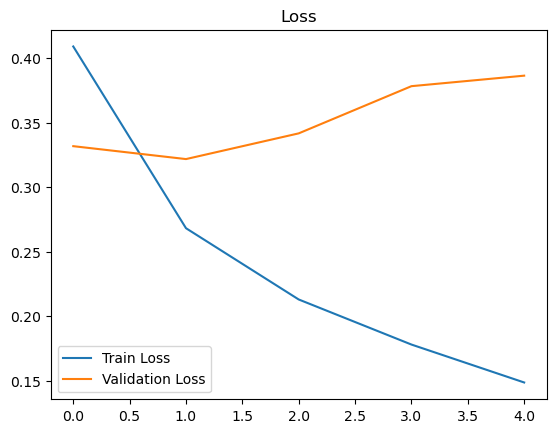

In [116]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()